In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("customer.csv")
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [6]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
for i in ['credit_card','active_member','products_number']:
    print(f"Column name - {i}")
    print(df[i].value_counts())
    print()

Column name - credit_card
1    7055
0    2945
Name: credit_card, dtype: int64

Column name - active_member
1    5151
0    4849
Name: active_member, dtype: int64

Column name - products_number
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64



In [10]:
for i in ['credit_card','active_member','products_number']:
    df[i] = df[i].astype('object')

In [11]:
for i in ['credit_card','active_member','products_number']:
    print(df[i].dtype)

object
object
object


In [12]:
df.drop('customer_id',inplace=True,axis=1)

In [13]:
tenure_yes = df[df['churn']==1].tenure 
tenure_no = df[df['churn']==0].tenure

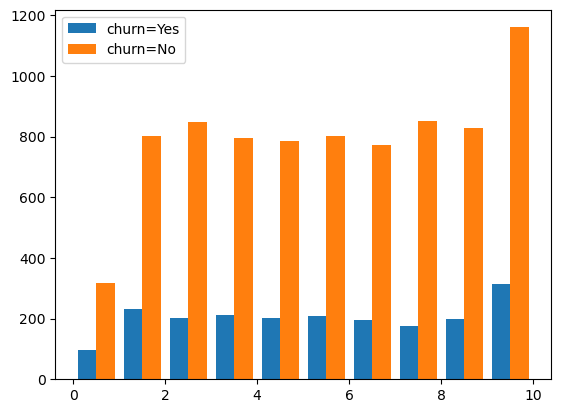

In [14]:
plt.hist([tenure_yes,tenure_no], label=['churn=Yes', 'churn=No'])
plt.legend()

In [15]:
member_yes = df[df['churn']==1].active_member
member_no = df[df['churn']==0].active_member

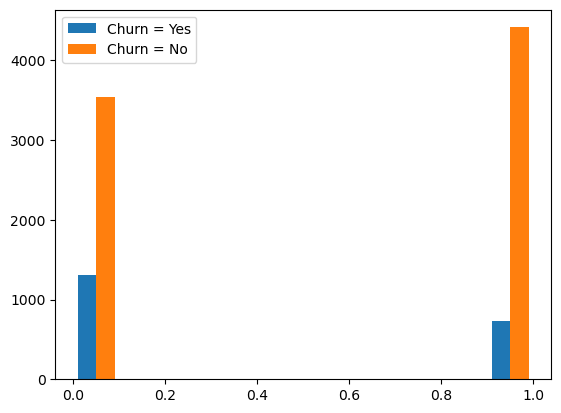

In [16]:
plt.hist([member_yes,member_no], label=['Churn = Yes', 'Churn = No'])
plt.legend()

In [17]:
female = df[df['gender']=='Female']
male = df[df['gender']=='Male']

female_yes = female[female['churn']==1].gender
female_no = female[female['churn']==0].gender

male_yes = male[male['churn']==1].gender
male_no = male[male['churn']==0].gender

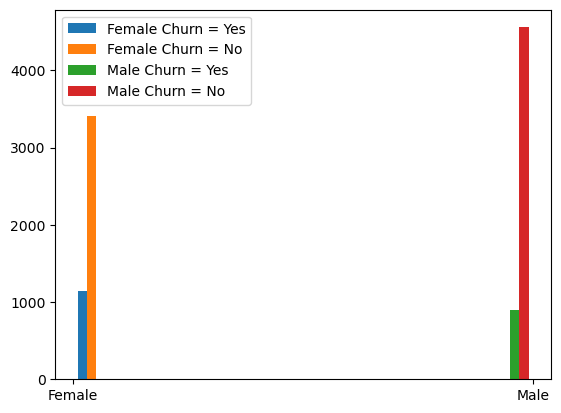

In [18]:
plt.hist([female_yes,female_no,male_yes,male_no], 
         label=['Female Churn = Yes', 'Female Churn = No', 'Male Churn = Yes', 'Male Churn = No'])
plt.legend()

In [19]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [20]:
df = pd.get_dummies(df,columns=['country', 'gender'])
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [21]:
X = df.drop('churn',axis=1)
y = df['churn']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
score = []

In [28]:
for estimators in range(1,10):
    model_1 = RandomForestClassifier(n_estimators=estimators).fit(X_train,y_train)
    score.append(model_1.score(X_test,y_test))

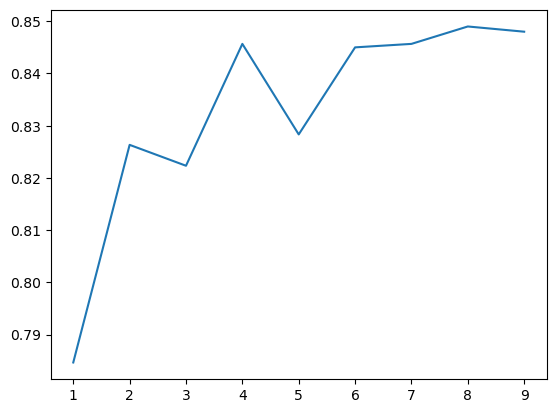

In [29]:
plt.plot(range(1,10),score)

In [30]:
model_1 = RandomForestClassifier(n_estimators=8).fit(X_train,y_train)

In [31]:
y_pred_1 = model_1.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(f"Classification Report for Random Forest : \n\n {classification_report(y_test,y_pred_1)}",
      "\n\n",
      f"Classfication Report for Decision Trees : \n\n {classification_report(y_test,y_pred)}")

Classification Report for Random Forest : 

               precision    recall  f1-score   support

           0       0.88      0.95      0.92      2438
           1       0.68      0.44      0.53       562

    accuracy                           0.86      3000
   macro avg       0.78      0.69      0.72      3000
weighted avg       0.84      0.86      0.84      3000
 

 Classfication Report for Decision Trees : 

               precision    recall  f1-score   support

           0       0.89      0.85      0.87      2438
           1       0.44      0.52      0.48       562

    accuracy                           0.79      3000
   macro avg       0.66      0.69      0.67      3000
weighted avg       0.80      0.79      0.79      3000



Text(0.5, 1.0, 'confusion_matrix for Decision Tree')

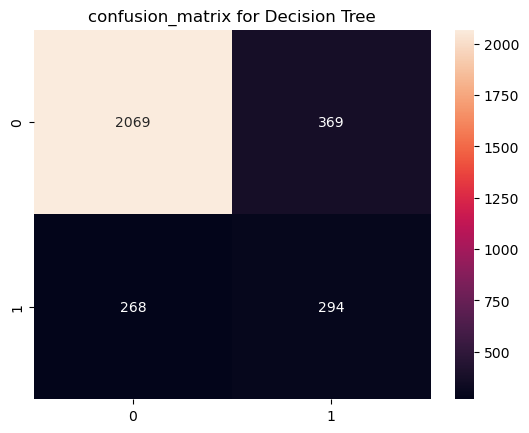

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt = 'd')
plt.title("confusion_matrix for Decision Tree")

Text(0.5, 1.0, 'confusion_matrix for Random Forest')

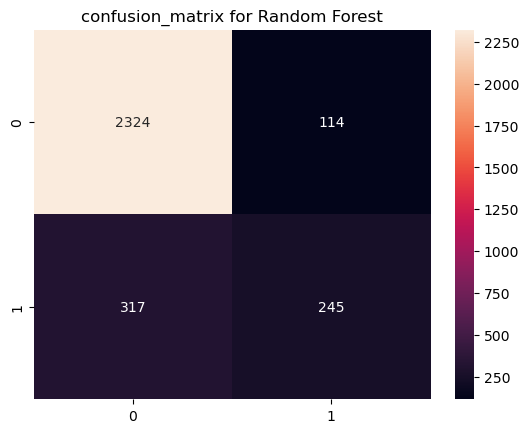

In [38]:
sns.heatmap(confusion_matrix(y_test,y_pred_1), annot=True, fmt = 'd')
plt.title("confusion_matrix for Random Forest")